In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#Importing Dataset

In [2]:
#primary_dataset = pd.read_csv('primary_data.csv', delimiter=';')
#primary_dataset.head()
secondary_dataset = pd.read_csv('secondary_data.csv', delimiter=';')
secondary_dataset.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w


#Overview of Dataset

In [3]:
secondary_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       51185 non-null  object 
 7   gill-spacing          36006 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             9531 non-null   object 
 12  stem-surface          22945 non-null  object 
 13  stem-color            61069 non-null  object 
 14  veil-type             3177 non-null   object 
 15  veil-color         

In [4]:
secondary_dataset.describe() #This only describes the numerical features

,cap-diameter,stem-height,stem-width
count,61069.000000,61069.000000,61069.000000
mean,6.733854,6.581538,12.149410
std,5.264845,3.370017,10.035955
min,0.380000,0.000000,0.000000
25%,3.480000,4.640000,5.210000
50%,5.860000,5.950000,10.190000
75%,8.540000,7.740000,16.570000
max,62.340000,33.920000,103.910000


##Plotting categorical variables

####Plotting absolute number

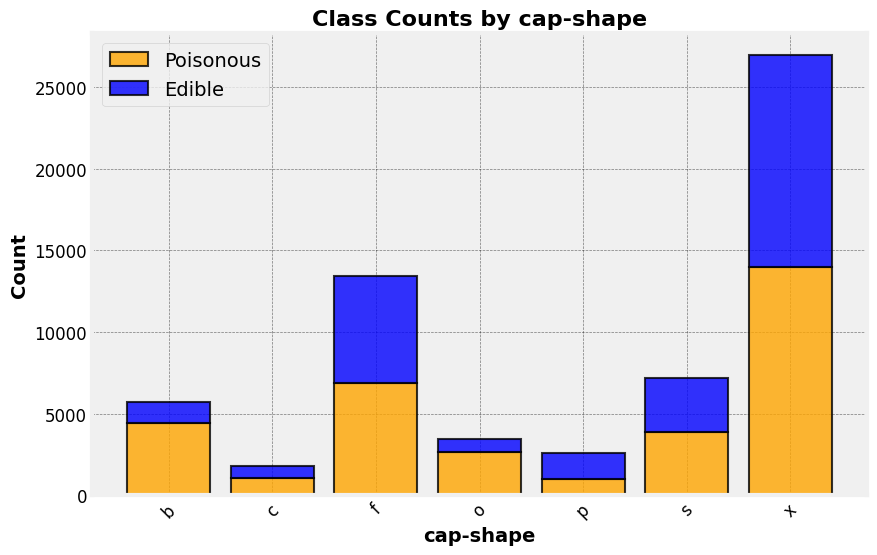

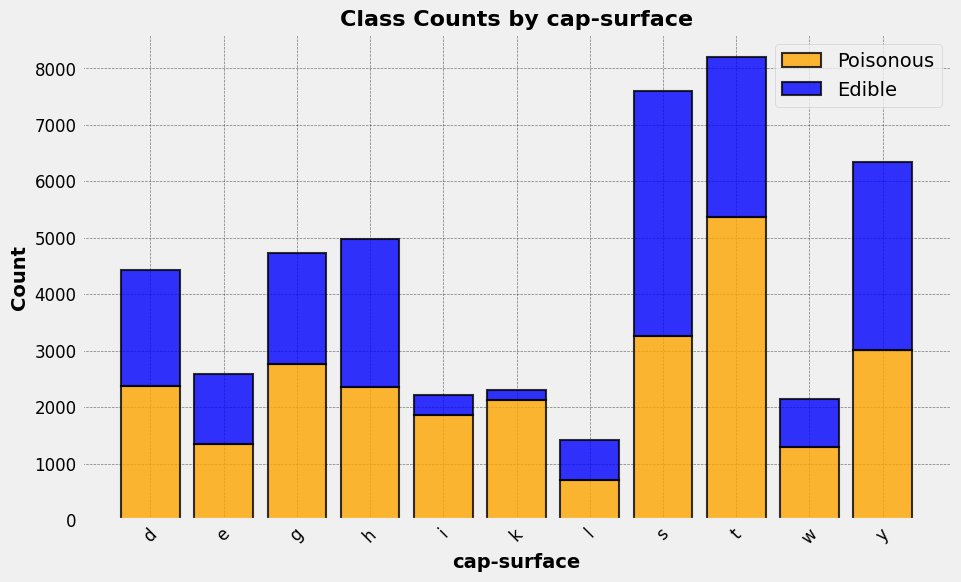

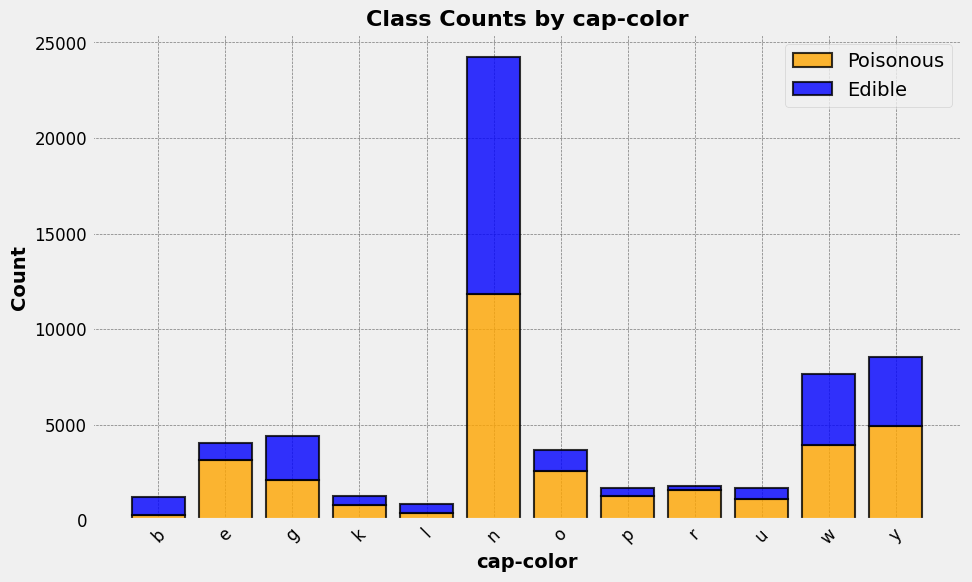

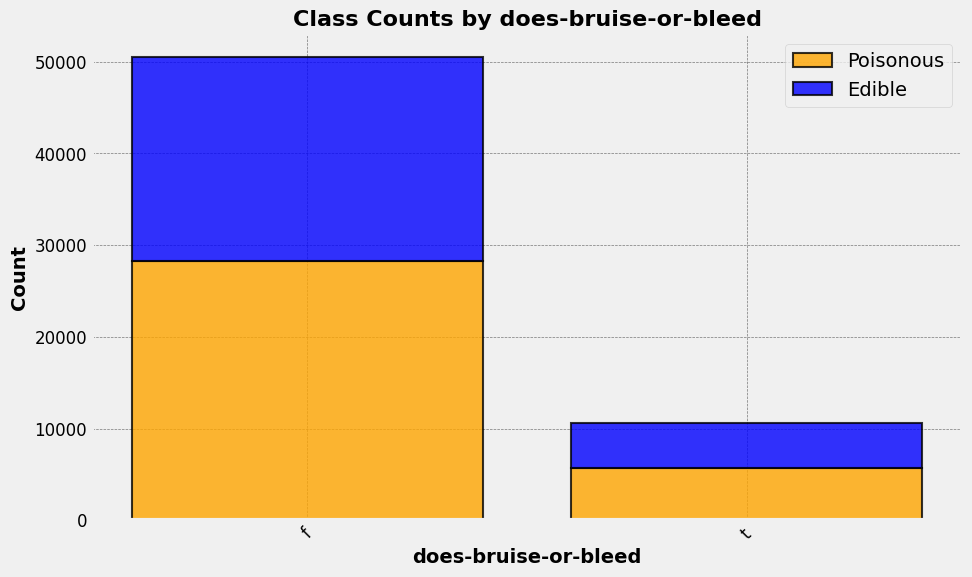

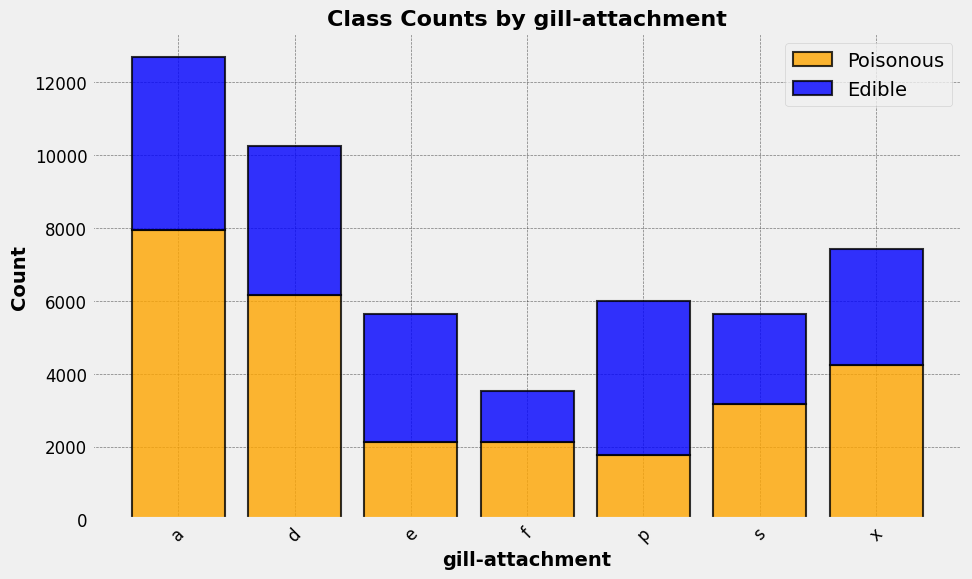

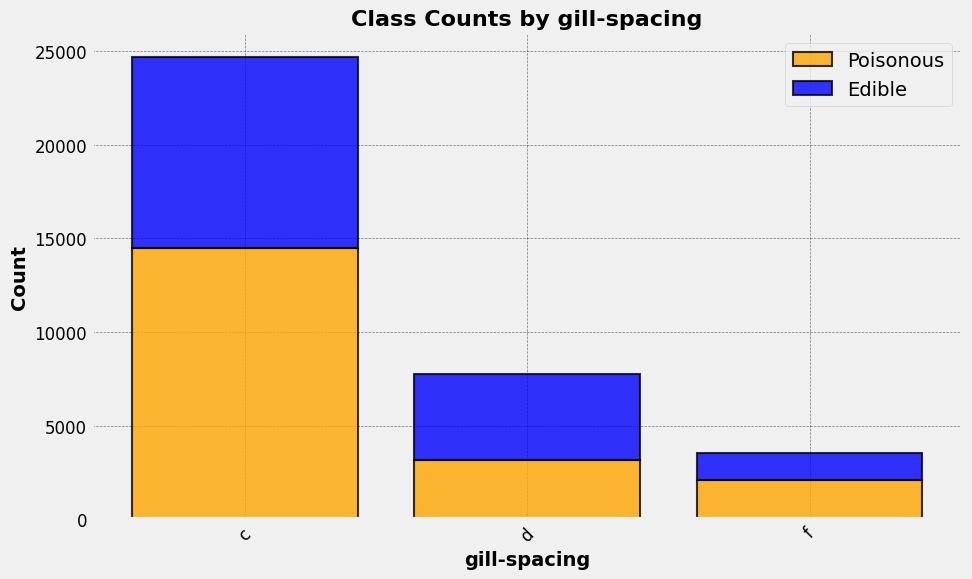

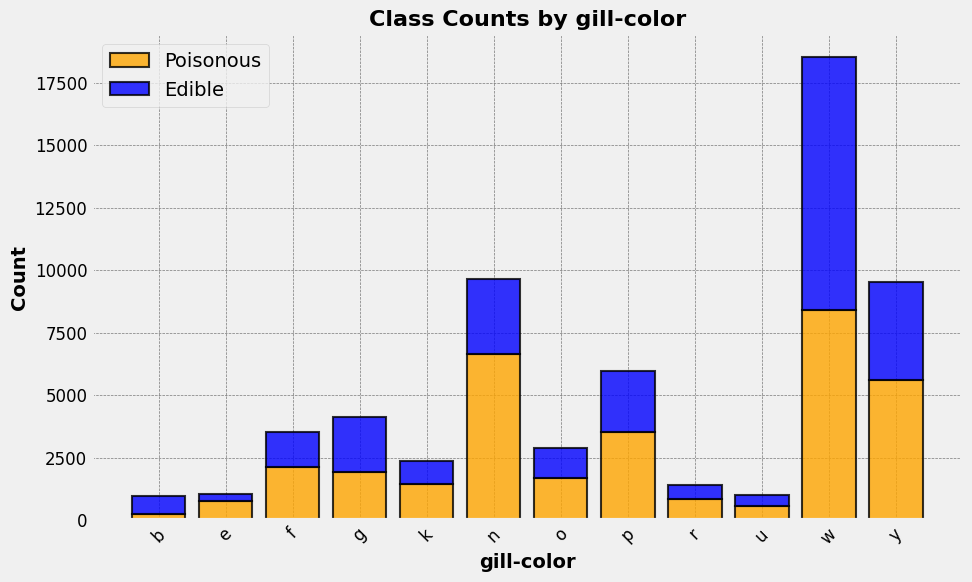

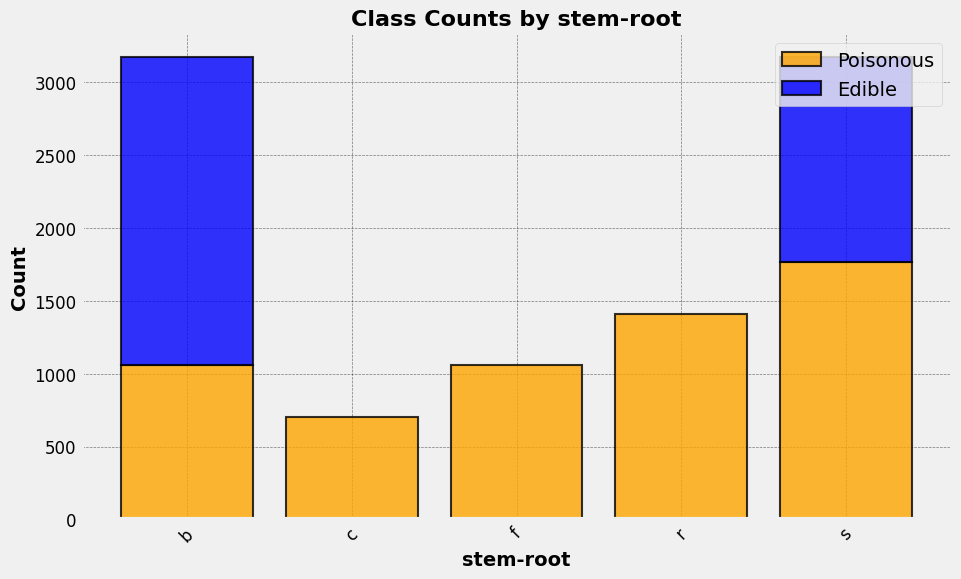

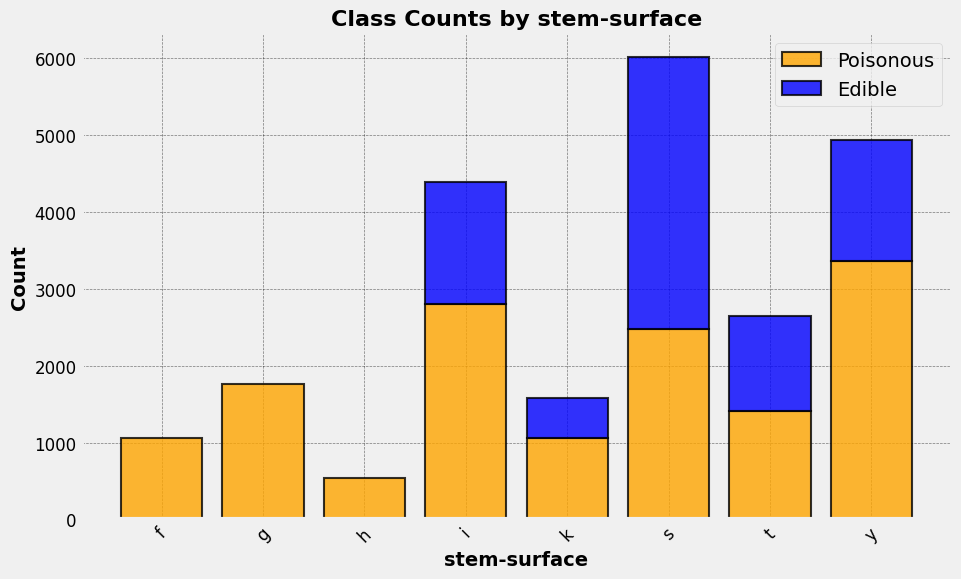

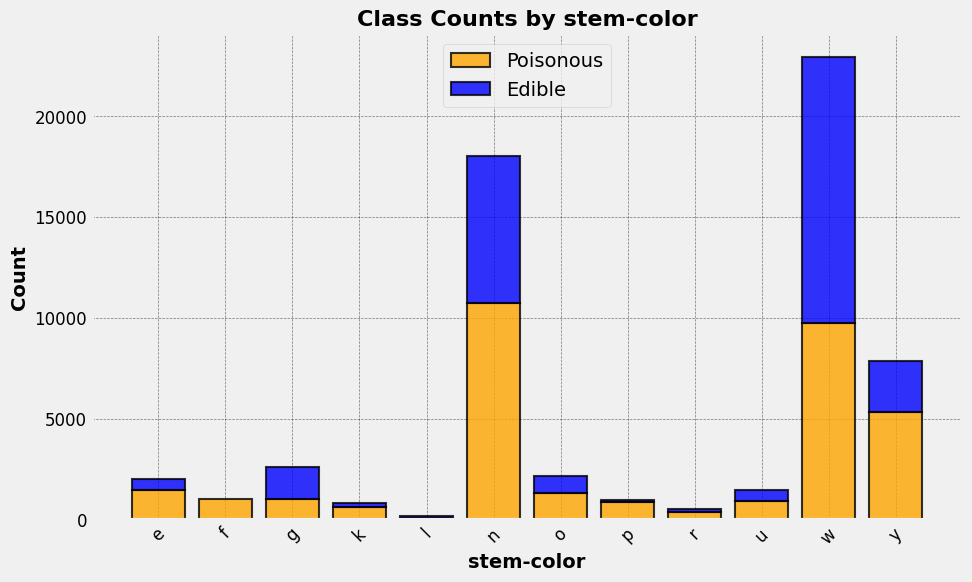

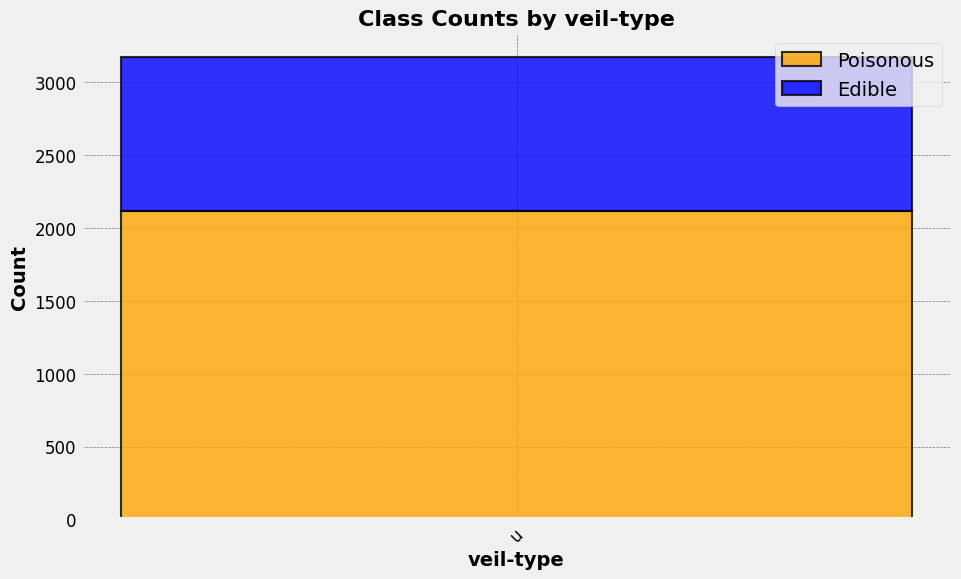

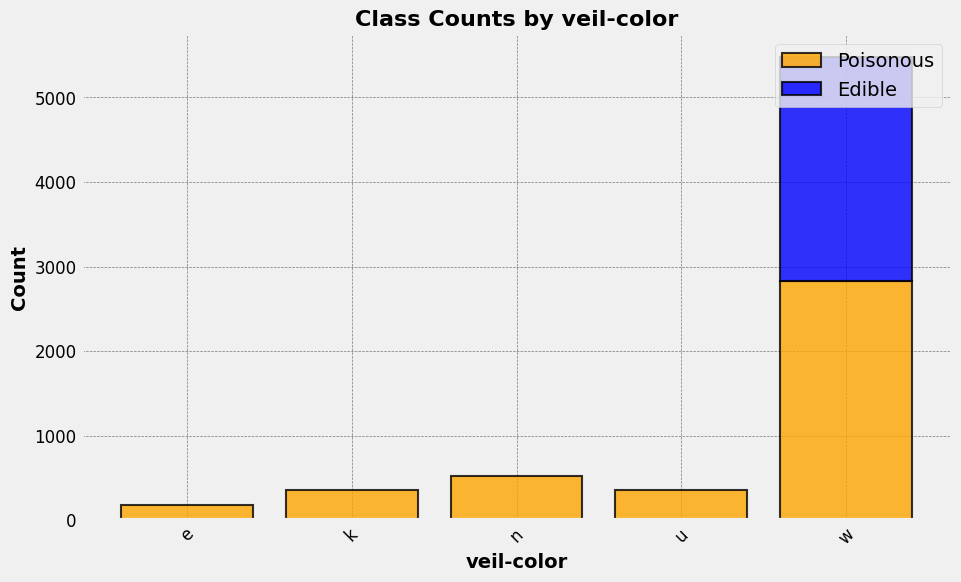

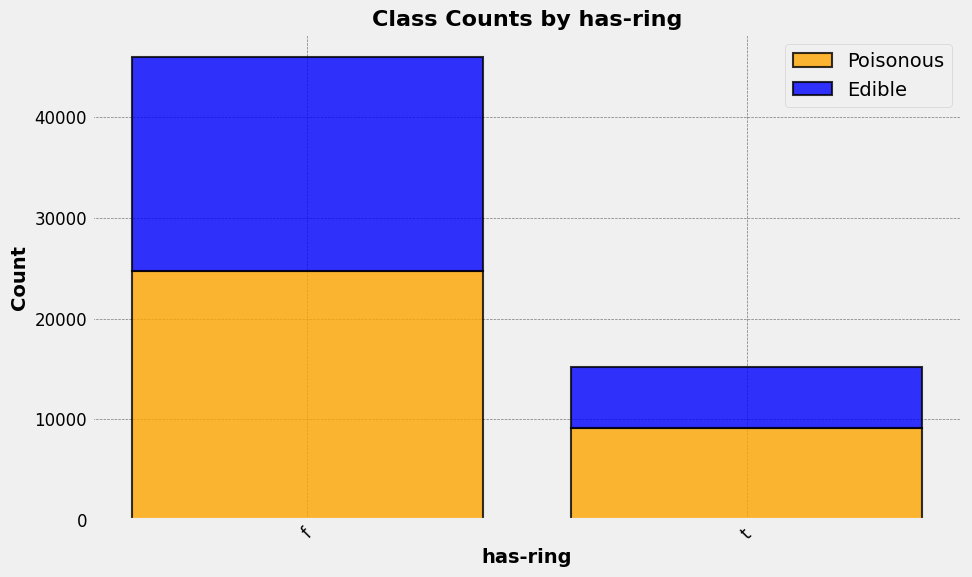

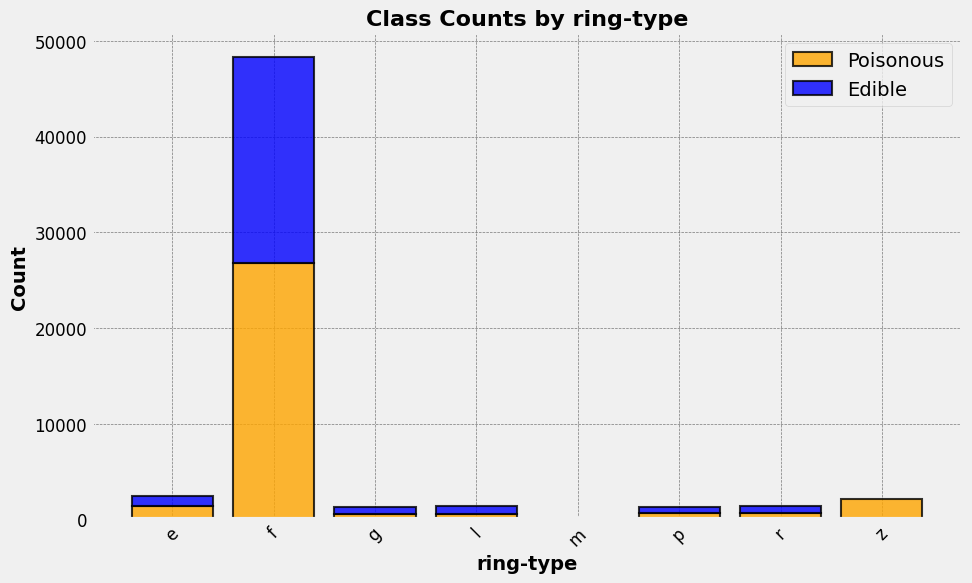

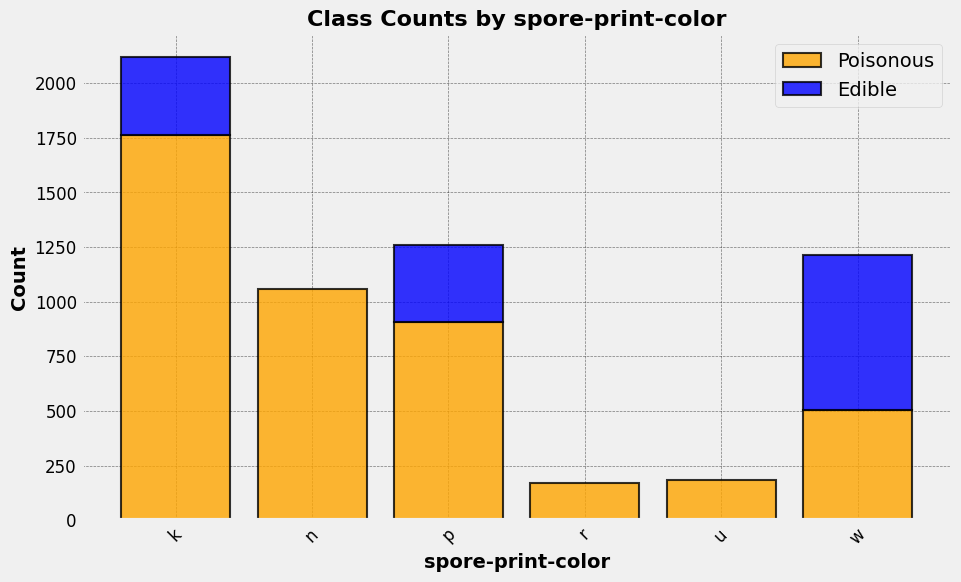

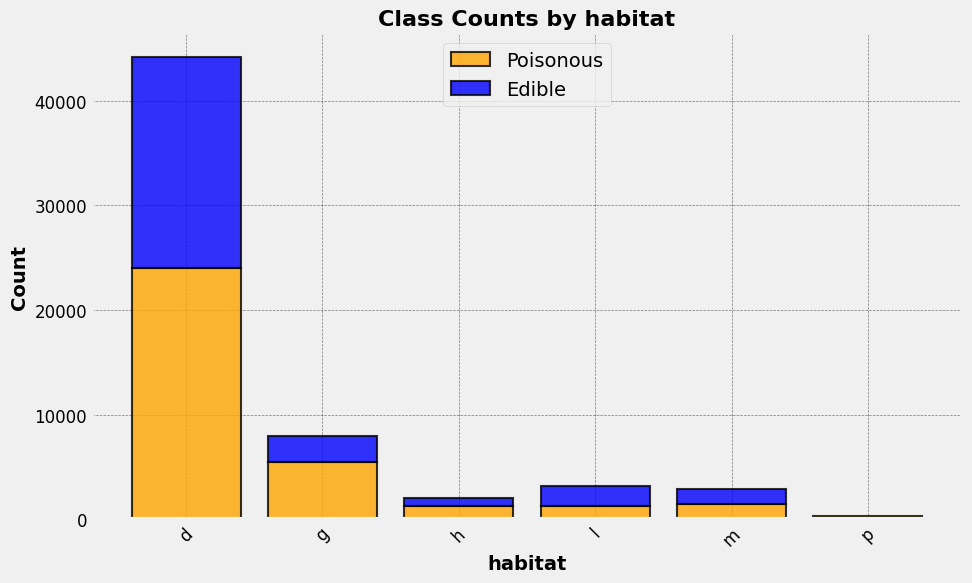

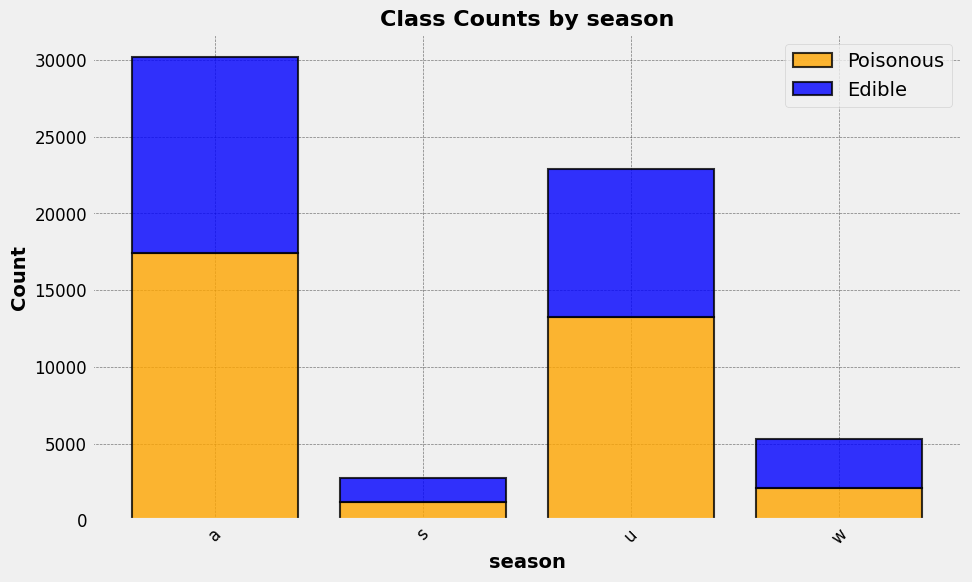

In [5]:
for column in secondary_dataset.select_dtypes(include=['object']).columns:
  if column != 'class':  # Exclude the target variable itself
    grouped_data = secondary_dataset.groupby([column, 'class']).size().unstack()

    fig = plt.figure(figsize=(10, 6))
    plt.style.use('fivethirtyeight')
    plt.bar(
        x=grouped_data.index,
        height=grouped_data["p"],
        label="Poisonous",
        color='orange',
        edgecolor='black',
        linewidth=1.5,
        alpha=0.8
    )

    plt.bar(
        x=grouped_data.index,
        height=grouped_data["e"],
        bottom=grouped_data["p"],
        label="Edible",
        color='blue',
        edgecolor='black',
        linewidth=1.5,
        alpha=0.8
    )

    plt.xlabel(column, fontsize=14, fontweight='bold')
    plt.ylabel('Count', fontsize=14, fontweight='bold')
    plt.title(f'Class Counts by {column}', fontsize=16, fontweight='bold')
    plt.xticks(fontsize=12, rotation=45)
    plt.yticks(fontsize=12)
    plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.5, color="black")
    plt.legend()

    plt.show()

####Plotting relative frequencies

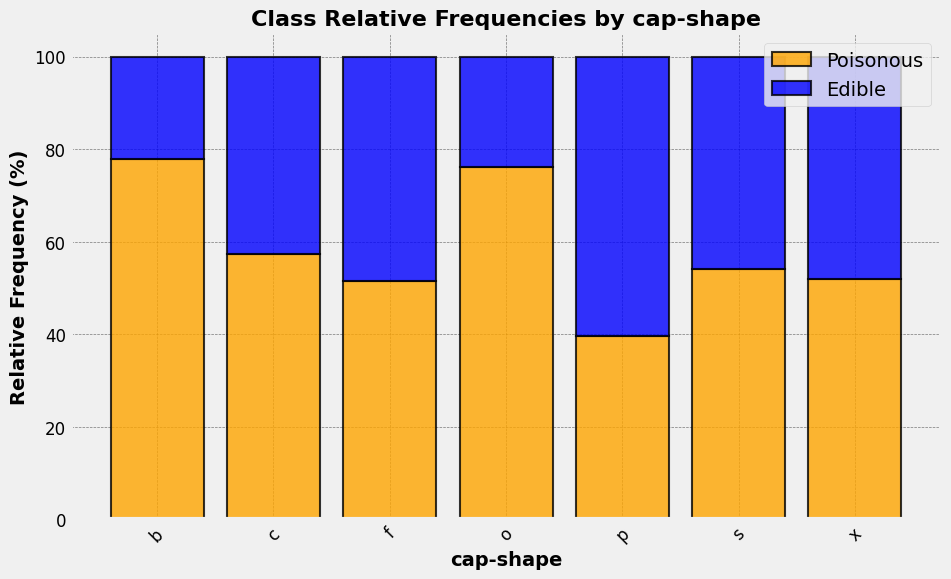

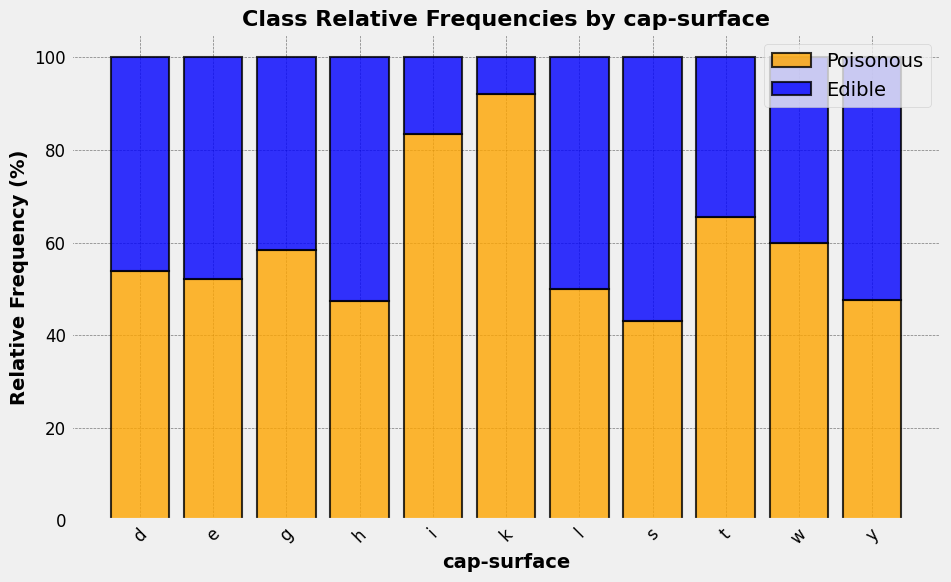

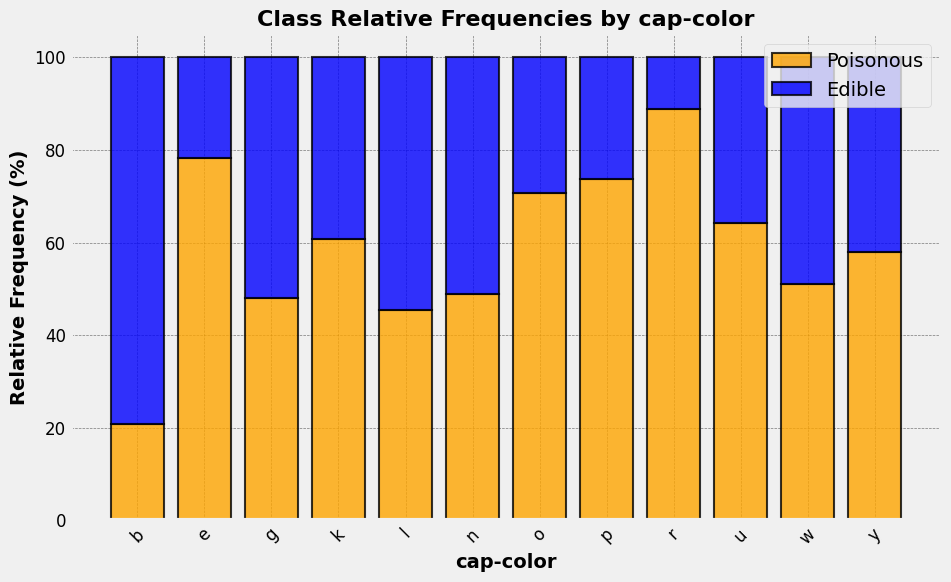

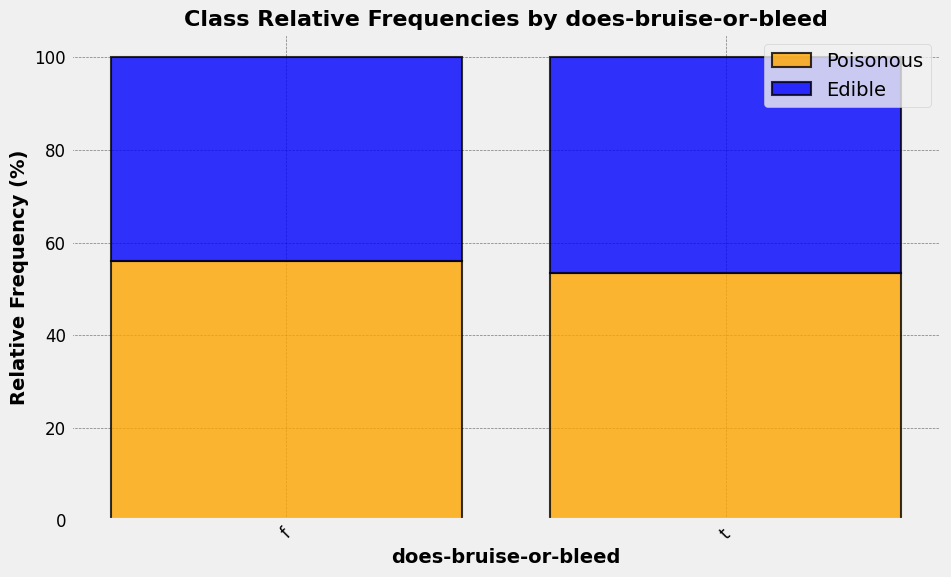

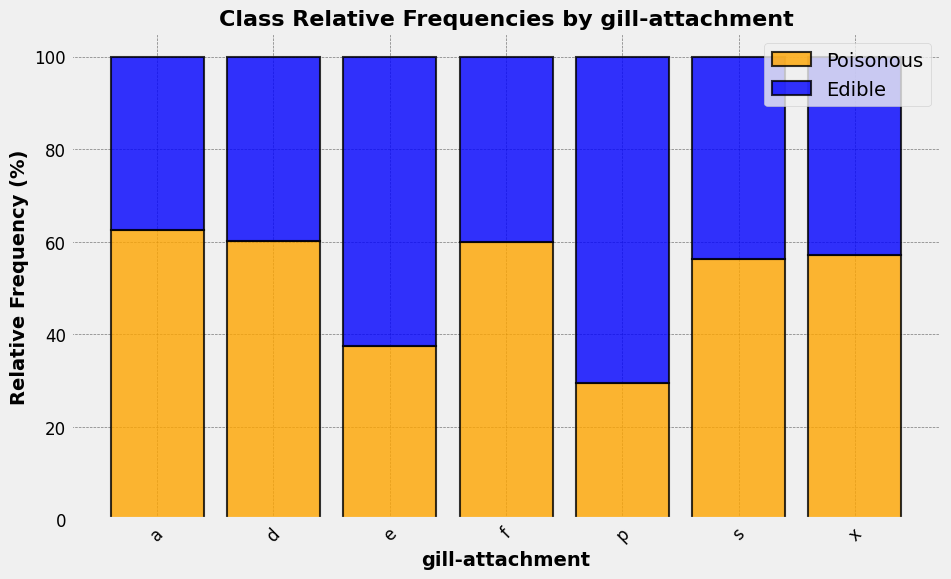

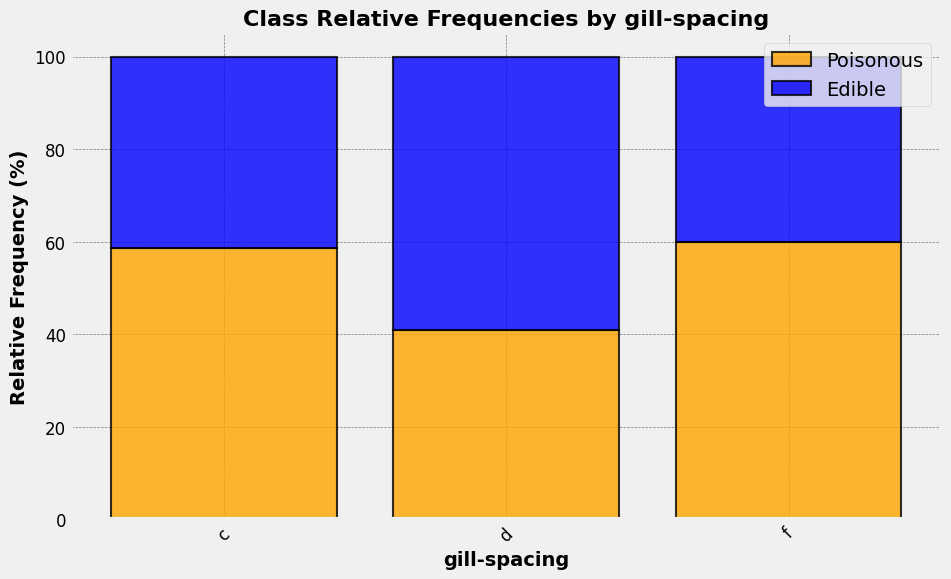

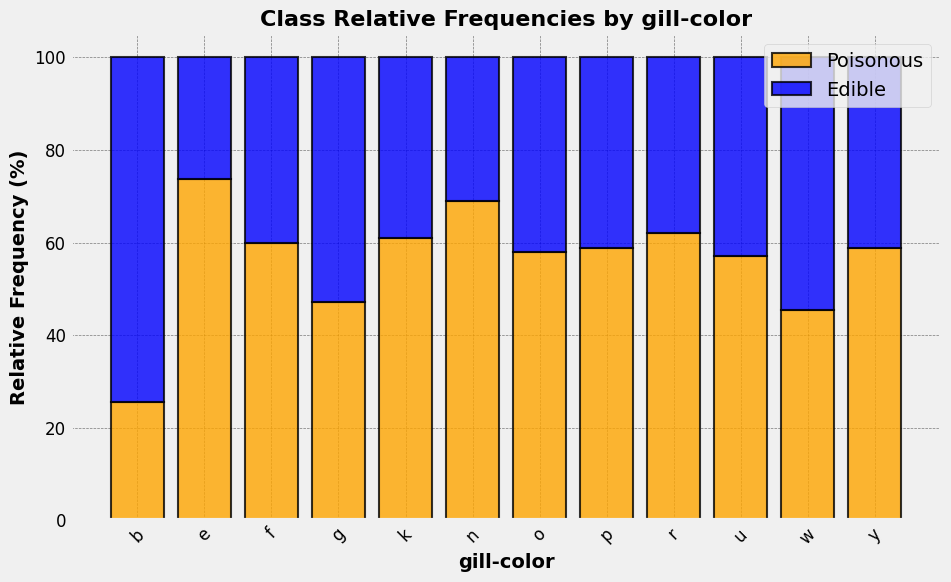

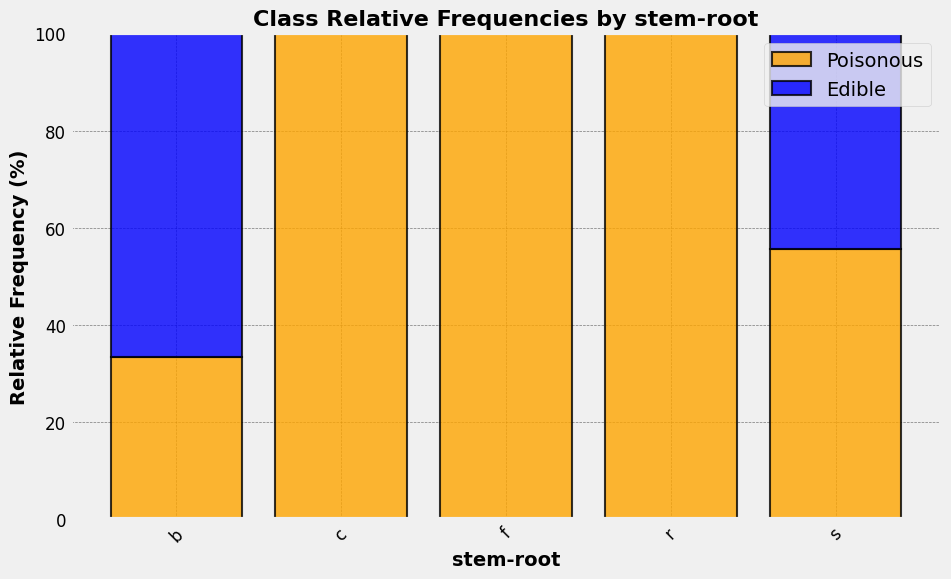

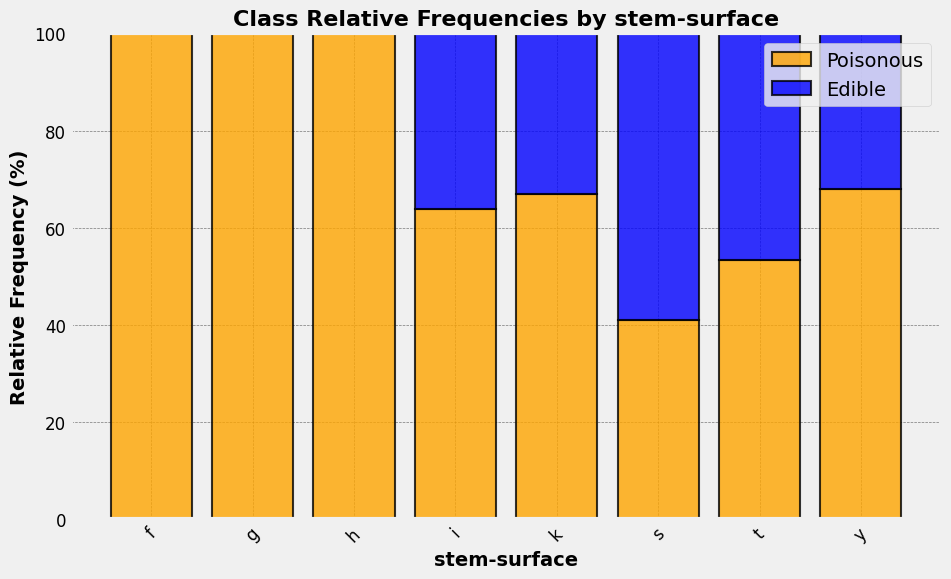

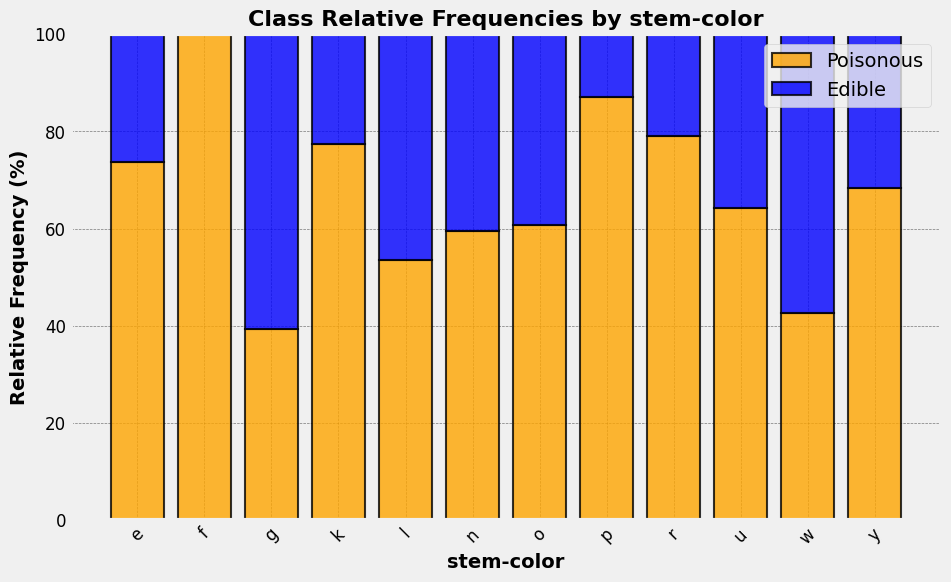

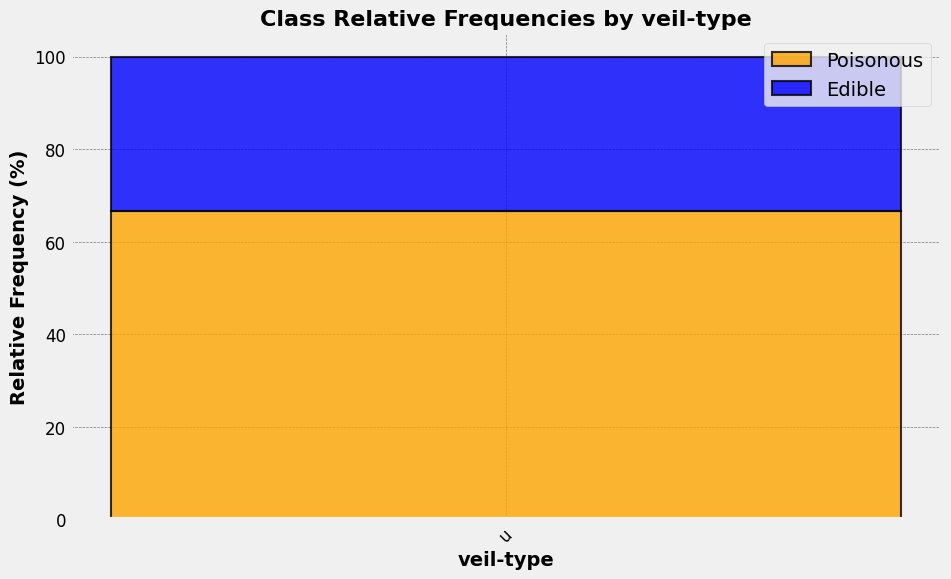

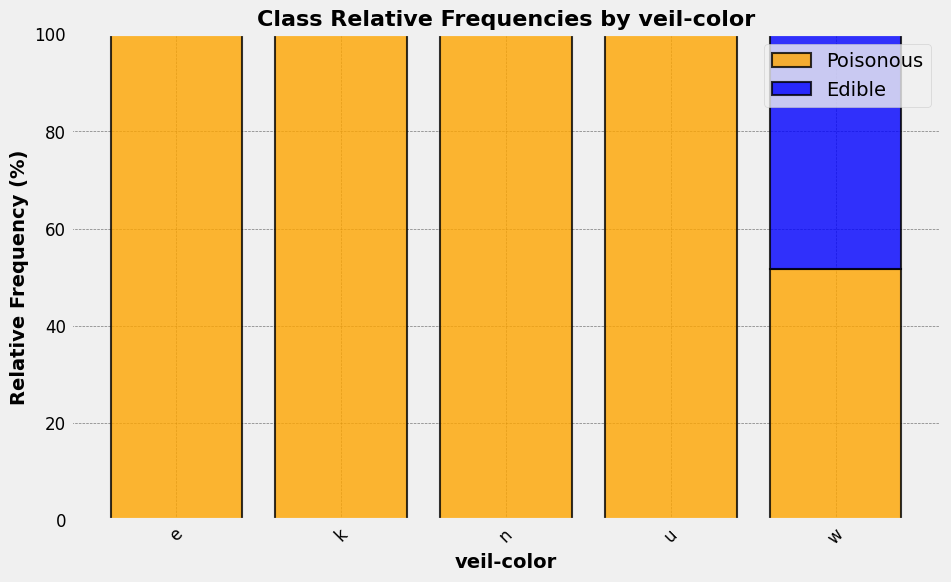

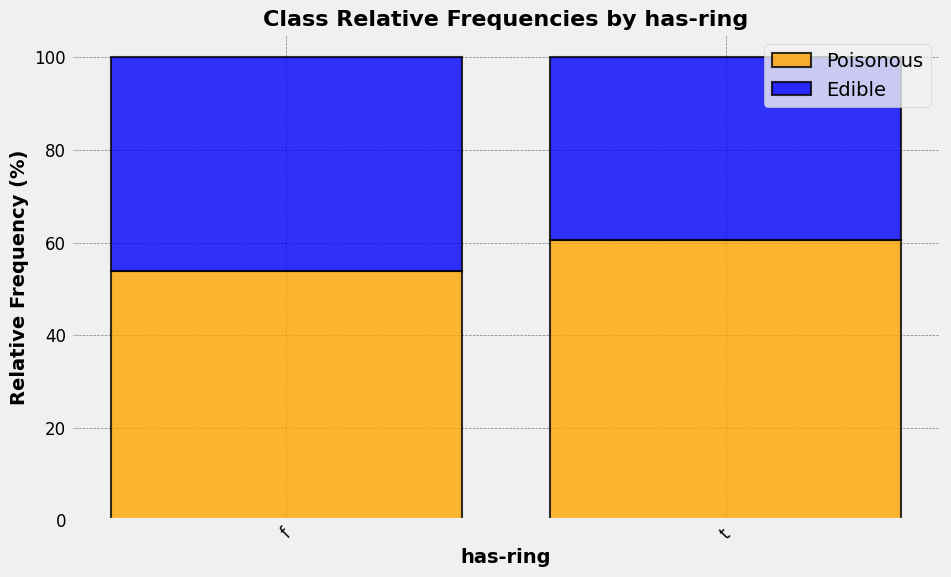

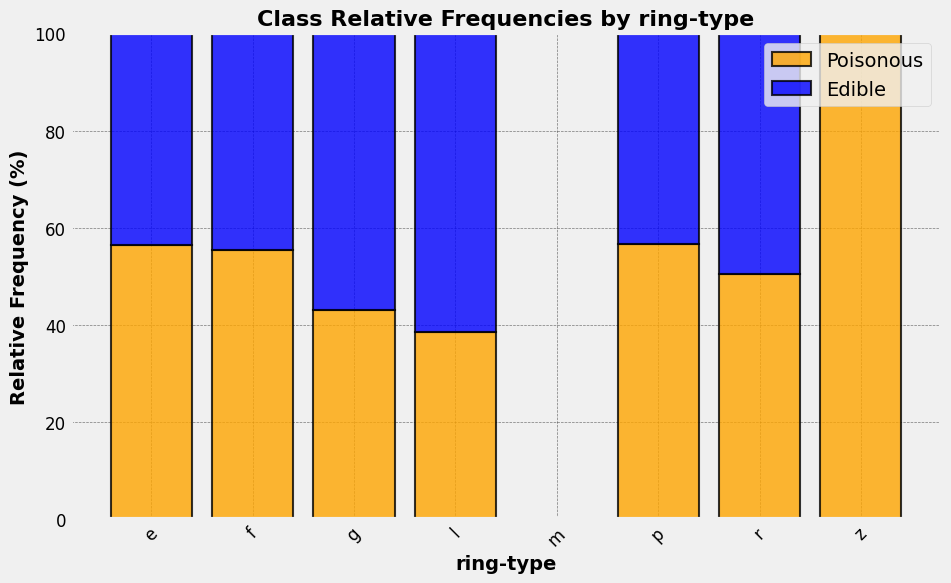

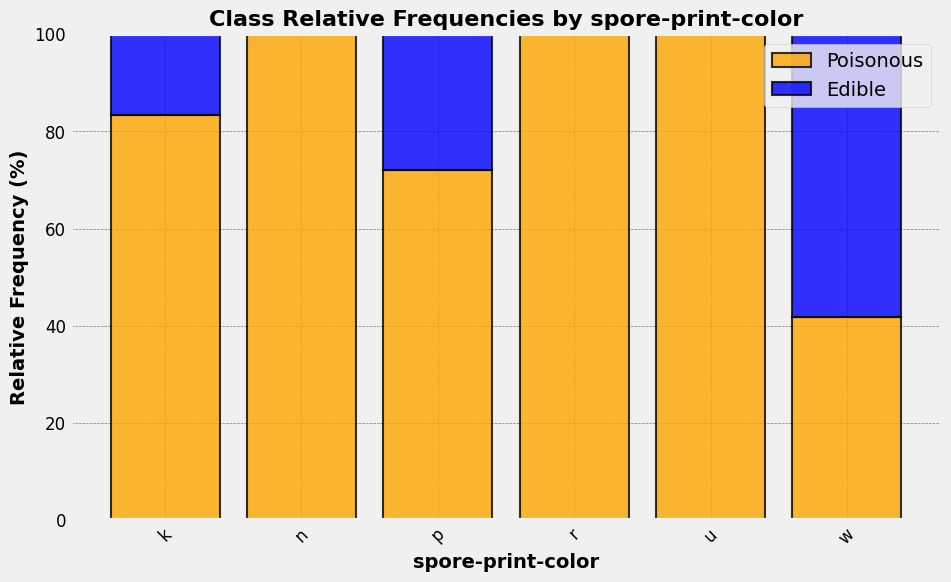

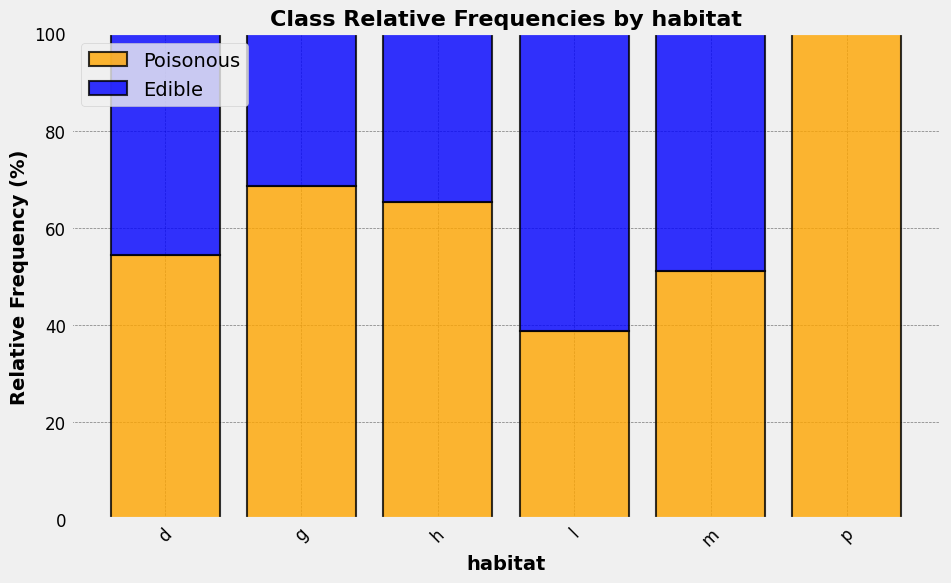

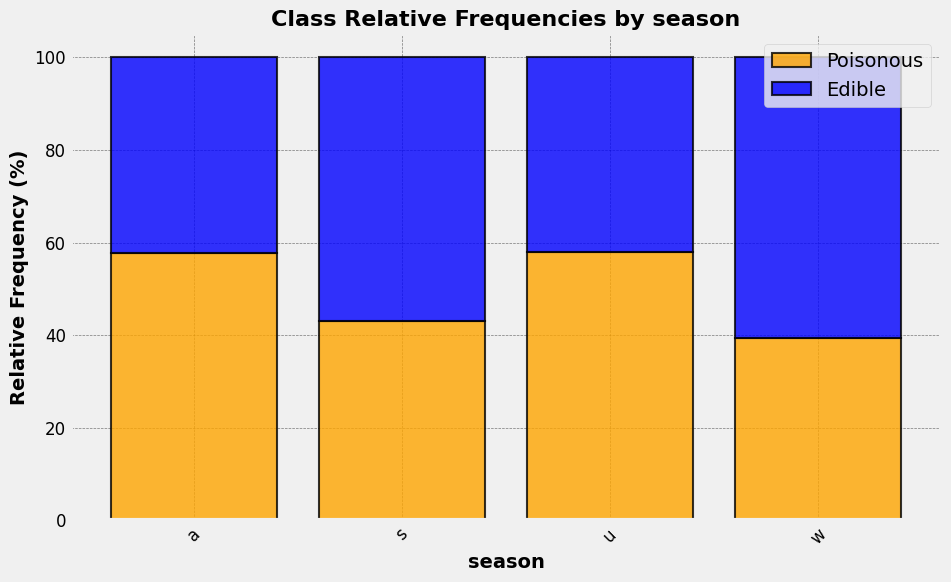

In [12]:
for column in secondary_dataset.select_dtypes(include=['object']).columns:
  if column != 'class':  # Exclude the target variable itself
    grouped_data = secondary_dataset.groupby([column, 'class']).size().unstack()
    total_counts = grouped_data.sum(axis=1)
    relative_frequencies = grouped_data.div(total_counts, axis=0) * 100  # Calculate relative frequencies

    fig = plt.figure(figsize=(10, 6))
    plt.style.use('fivethirtyeight')
    plt.bar(
        x=relative_frequencies.index,
        height=relative_frequencies["p"],
        label="Poisonous",
        color='orange',
        edgecolor='black',
        linewidth=1.5,
        alpha=0.8
    )

    plt.bar(
        x=relative_frequencies.index,
        height=relative_frequencies["e"],
        bottom=relative_frequencies["p"],
        label="Edible",
        color='blue',
        edgecolor='black',
        linewidth=1.5,
        alpha=0.8
    )

    plt.xlabel(column, fontsize=14, fontweight='bold')
    plt.ylabel('Relative Frequency (%)', fontsize=14, fontweight='bold')
    plt.title(f'Class Relative Frequencies by {column}', fontsize=16, fontweight='bold')
    plt.xticks(fontsize=12, rotation=45)
    plt.yticks(fontsize=12)
    plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.5, color="black")
    plt.legend()

    plt.show()


##Plotting Numerical variables

###Plotting cap-diameter

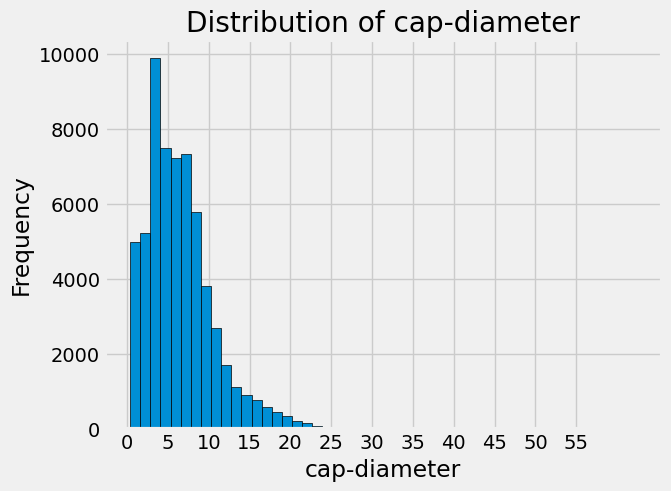

In [6]:
plt.hist(secondary_dataset['cap-diameter'], bins=50, edgecolor='black')
plt.xticks(range(0, 60, 5))
plt.xlabel('cap-diameter')
plt.ylabel('Frequency')
plt.title('Distribution of cap-diameter')
plt.show()

###Plotting stem-height variable

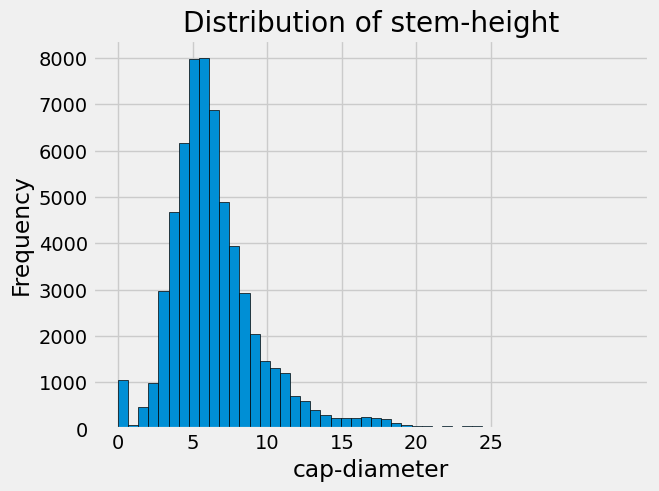

In [7]:
plt.hist(secondary_dataset['stem-height'], bins=50, edgecolor='black')
plt.xticks(range(0, 30, 5))
plt.xlabel('cap-diameter')
plt.ylabel('Frequency')
plt.title('Distribution of stem-height')
plt.show()

###Plotting stem-width variable

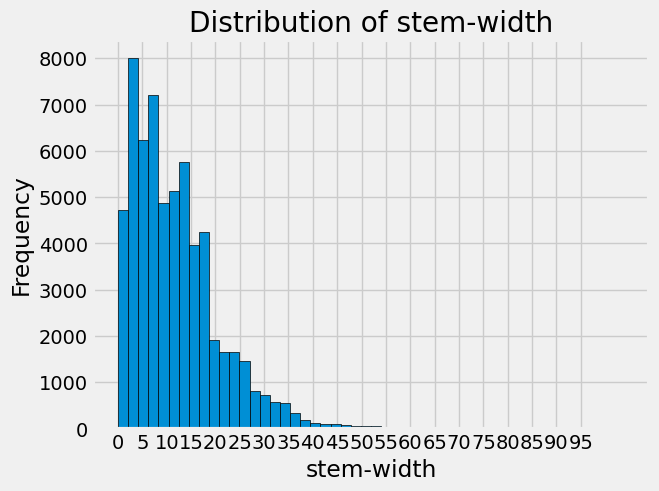

In [8]:
plt.hist(secondary_dataset['stem-width'], bins=50, edgecolor='black')
plt.xticks(range(0, 100, 5))
plt.xlabel('stem-width')
plt.ylabel('Frequency')
plt.title('Distribution of stem-width')
plt.show()

##Plotting Target variable vs Numerical variable

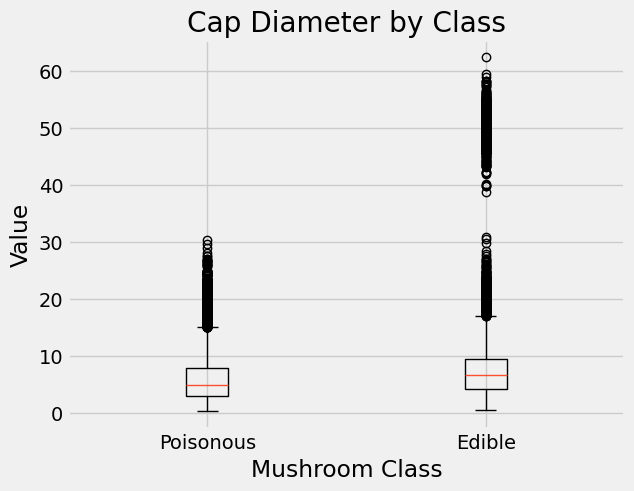

In [22]:
poisonous_mushroom = secondary_dataset[secondary_dataset['class'] == 'p']
edible_mushroom = secondary_dataset[secondary_dataset['class'] == 'e']

plt.boxplot([poisonous_mushroom['cap-diameter'], edible_mushroom['cap-diameter']], labels=['Poisonous', 'Edible'])
plt.title('Cap Diameter by Class')
plt.xlabel('Mushroom Class')
plt.ylabel('Value')
plt.show()

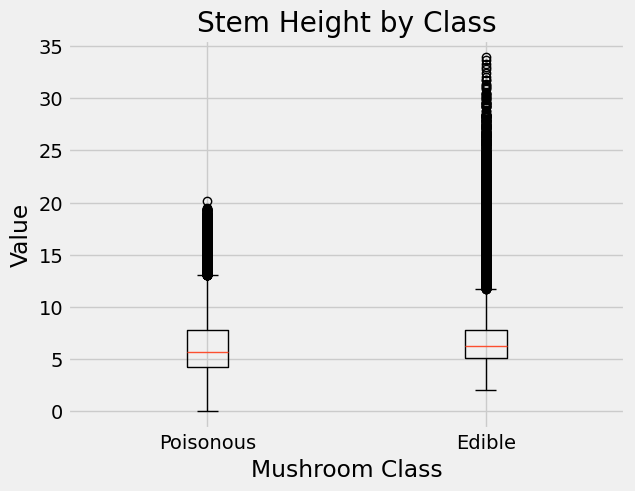

In [23]:
poisonous_mushroom = secondary_dataset[secondary_dataset['class'] == 'p']
edible_mushroom = secondary_dataset[secondary_dataset['class'] == 'e']

plt.boxplot([poisonous_mushroom['stem-height'], edible_mushroom['stem-height']], labels=['Poisonous', 'Edible'])
plt.title('Stem Height by Class')
plt.xlabel('Mushroom Class')
plt.ylabel('Value')
plt.show()

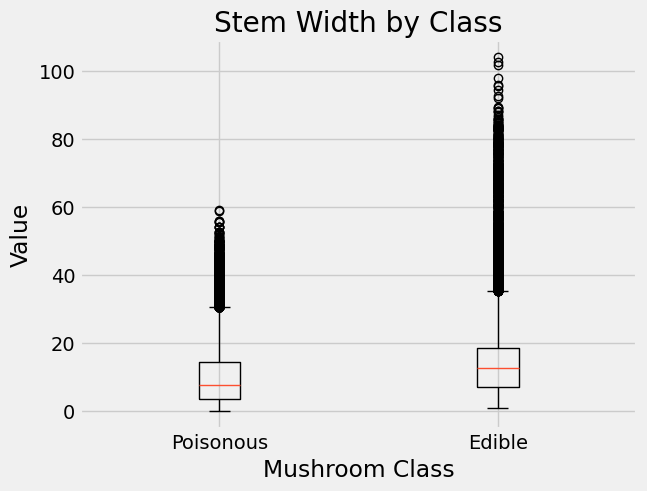

In [25]:
poisonous_mushroom = secondary_dataset[secondary_dataset['class'] == 'p']
edible_mushroom = secondary_dataset[secondary_dataset['class'] == 'e']

plt.boxplot([poisonous_mushroom['stem-width'], edible_mushroom['stem-width']], labels=['Poisonous', 'Edible'])
plt.title('Stem Width by Class')
plt.xlabel('Mushroom Class')
plt.ylabel('Value')
plt.show()